In [33]:

import os
import pandas as pd
import nltk
import re 
import seaborn as sns 
import matplotlib.pyplot as plt
import streamlit

# Set the path to the directory where your CSV files are stored
path = 'D:/HUMAN_RESOURCE_MANAGMENT'  # replace with your CSV files' directory path
all_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.csv')]

# List to hold dataframes
df_list = []

# Loop through all CSV files and append to the list
for filename in all_files:
    
    df = pd.read_csv(filename, index_col=None, header=0, encoding='ISO-8859-1')
    df_list.append(df)

# Concatenate all dataframes into a single dataframe
data= pd.concat(df_list, axis=0, ignore_index=True)

# Now you have a new dataframe 'combined_df' with all your CSV data

data
# This will display the DataFrame with some default styling


,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,162,224,150,74,23,13,10,201,137,64
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,16,92,65,27,14,12,2,78,53,25
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,0,37,27,10,8,6,2,29,21,8
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,`19,`345,District - Purba Medinipur,`99,`990,`9900,Activities of extraterritorial organizations a...,18,12,6,...,6,0,0,0,0,0,0,0,0,0
195141,`19,`345,District - Purba Medinipur,`99,`991,`0000,Blank,8244,5866,2378,...,876,25591,8488,17103,22057,7272,14785,3534,1216,2318
195142,`19,`345,District - Purba Medinipur,`99,`991,`9910,Blank,8244,5866,2378,...,876,25591,8488,17103,22057,7272,14785,3534,1216,2318
195143,`19,`345,District - Purba Medinipur,`99,`992,`0000,Incomplete description/ Wrongly Classifed,8324,4604,3720,...,932,14872,3352,11520,13204,2934,10270,1668,418,1250


In [34]:
data.rename(columns={
    'NIC Name': 'NIC_NAME',
    "India/States": "state_ut",
    'State Code': 'State_Code',
    'District Code': 'District_Code'
}, inplace=True)

In [35]:
data["NIC_NAME"]=="Incomplete description/ Wrongly Classifed"

0         False
1         False
2         False
3         False
4         False
          ...  
195140    False
195141    False
195142    False
195143     True
195144     True
Name: NIC_NAME, Length: 195145, dtype: bool

In [36]:
data=data[~data['NIC_NAME'].isin(["Blank","Incomplete description/ Wrongly Classifed","incomplete","BLANK","Blank etc."])]
data

,State_Code,District_Code,state_ut,Division,Group,Class,NIC_NAME,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,162,224,150,74,23,13,10,201,137,64
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,16,92,65,27,14,12,2,78,53,25
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,0,37,27,10,8,6,2,29,21,8
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195136,`19,`345,District - Purba Medinipur,`98,`982,`0000,Undifferentiated service-producing activities ...,0,0,0,...,0,13,0,13,9,0,9,4,0,4
195137,`19,`345,District - Purba Medinipur,`98,`982,`9820,Undifferentiated service-producing activities ...,0,0,0,...,0,13,0,13,9,0,9,4,0,4
195138,`19,`345,District - Purba Medinipur,`99,`000,`0000,Activities of extraterritorial organizations a...,16586,10482,6104,...,1814,40463,11840,28623,35261,10206,25055,5202,1634,3568
195139,`19,`345,District - Purba Medinipur,`99,`990,`0000,Activities of extraterritorial organizations a...,18,12,6,...,6,0,0,0,0,0,0,0,0,0


In [37]:
data['state_ut']

0               STATE - NCT OF DELHI
1               STATE - NCT OF DELHI
2               STATE - NCT OF DELHI
3               STATE - NCT OF DELHI
4               STATE - NCT OF DELHI
                     ...            
195136    District - Purba Medinipur
195137    District - Purba Medinipur
195138    District - Purba Medinipur
195139    District - Purba Medinipur
195140    District - Purba Medinipur
Name: state_ut, Length: 193207, dtype: object

total words state wise

In [38]:
h=data[data["NIC_NAME"].str.lower()=="total"]
df = h[h['state_ut'].str.startswith('STATE')]


state totals dataframe

In [39]:
df

,State_Code,District_Code,state_ut,Division,Group,Class,NIC_NAME,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
5997,`16,`000,STATE - TRIPURA,`00,`000,`0000,Total,125810,105429,20381,...,9897,41251,18220,23031,27356,11430,15926,13895,6790,7105
8018,`20,`000,STATE - JHARKHAND,`00,`000,`0000,Total,382164,306058,76106,...,29874,218368,142235,76133,167089,104781,62308,51279,37454,13825
17461,`24,`000,STATE - GUJARAT,`00,`000,`0000,Total,772722,636424,136298,...,95024,99236,51750,47486,45145,18836,26309,54091,32914,21177
28537,`27,`000,STATE - MAHARASHTRA,`00,`000,`0000,Total,2280899,1728173,552726,...,412992,292200,177937,114263,97675,56171,41504,194525,121766,72759
46718,`29,`000,STATE - KARNATAKA,`00,`000,`0000,Total,1755235,1227445,527790,...,261638,352509,194872,157637,212057,111508,100549,140452,83364,57088
62049,`30,`000,STATE - GOA,`00,`000,`0000,Total,7573,5536,2037,...,1459,1784,1025,759,820,456,364,964,569,395
63114,`32,`000,STATE - KERALA,`00,`000,`0000,Total,772716,547815,224901,...,97003,239251,120328,118923,141166,69499,71667,98085,50829,47256
71158,`33,`000,STATE - TAMIL NADU,`00,`000,`0000,Total,2568994,1849620,719374,...,400719,450227,248895,201332,256753,137081,119672,193474,111814,81660
88685,`34,`000,STATE - PUDUCHERRY,`00,`000,`0000,Total,39807,28649,11158,...,7076,4639,2868,1771,2212,1354,858,2427,1514,913


datasets exported here

In [40]:
data.reset_index(drop=True)

,State_Code,District_Code,state_ut,Division,Group,Class,NIC_NAME,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,162,224,150,74,23,13,10,201,137,64
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,16,92,65,27,14,12,2,78,53,25
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,0,37,27,10,8,6,2,29,21,8
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193202,`19,`345,District - Purba Medinipur,`98,`982,`0000,Undifferentiated service-producing activities ...,0,0,0,...,0,13,0,13,9,0,9,4,0,4
193203,`19,`345,District - Purba Medinipur,`98,`982,`9820,Undifferentiated service-producing activities ...,0,0,0,...,0,13,0,13,9,0,9,4,0,4
193204,`19,`345,District - Purba Medinipur,`99,`000,`0000,Activities of extraterritorial organizations a...,16586,10482,6104,...,1814,40463,11840,28623,35261,10206,25055,5202,1634,3568
193205,`19,`345,District - Purba Medinipur,`99,`990,`0000,Activities of extraterritorial organizations a...,18,12,6,...,6,0,0,0,0,0,0,0,0,0


In [41]:
data

,State_Code,District_Code,state_ut,Division,Group,Class,NIC_NAME,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,162,224,150,74,23,13,10,201,137,64
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,16,92,65,27,14,12,2,78,53,25
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,0,37,27,10,8,6,2,29,21,8
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195136,`19,`345,District - Purba Medinipur,`98,`982,`0000,Undifferentiated service-producing activities ...,0,0,0,...,0,13,0,13,9,0,9,4,0,4
195137,`19,`345,District - Purba Medinipur,`98,`982,`9820,Undifferentiated service-producing activities ...,0,0,0,...,0,13,0,13,9,0,9,4,0,4
195138,`19,`345,District - Purba Medinipur,`99,`000,`0000,Activities of extraterritorial organizations a...,16586,10482,6104,...,1814,40463,11840,28623,35261,10206,25055,5202,1634,3568
195139,`19,`345,District - Purba Medinipur,`99,`990,`0000,Activities of extraterritorial organizations a...,18,12,6,...,6,0,0,0,0,0,0,0,0,0


In [42]:
pd.DataFrame(data.state_ut.unique())

,0
0,STATE - NCT OF DELHI
1,District - North West
2,District - North
3,District - North East
4,District - East
...,...
486,District - Haora
487,District - Kolkata
488,District - South Twenty Four Parganas
489,District - Paschim Medinipur


In [43]:
data.state_ut.value_counts()

state_ut
STATE - WEST BENGAL                      745
STATE - RAJASTHAN                        744
District - North Twenty Four Parganas    739
STATE - KARNATAKA                        737
STATE - TAMIL NADU                       732
                                        ... 
District - Mahe                           12
District - Kaushambi                       8
District - Kannauj                         8
District - Mainpuri                        5
District - Baghpat                         4
Name: count, Length: 491, dtype: int64

In [44]:
data

,State_Code,District_Code,state_ut,Division,Group,Class,NIC_NAME,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,162,224,150,74,23,13,10,201,137,64
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,16,92,65,27,14,12,2,78,53,25
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,0,37,27,10,8,6,2,29,21,8
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195136,`19,`345,District - Purba Medinipur,`98,`982,`0000,Undifferentiated service-producing activities ...,0,0,0,...,0,13,0,13,9,0,9,4,0,4
195137,`19,`345,District - Purba Medinipur,`98,`982,`9820,Undifferentiated service-producing activities ...,0,0,0,...,0,13,0,13,9,0,9,4,0,4
195138,`19,`345,District - Purba Medinipur,`99,`000,`0000,Activities of extraterritorial organizations a...,16586,10482,6104,...,1814,40463,11840,28623,35261,10206,25055,5202,1634,3568
195139,`19,`345,District - Purba Medinipur,`99,`990,`0000,Activities of extraterritorial organizations a...,18,12,6,...,6,0,0,0,0,0,0,0,0,0


state only data

In [45]:
state_mask = data['state_ut'].str.startswith('state')
state_df = data[state_mask]
state_df
district= data['state_ut'].str.startswith('district')
dist_df=data[district]
dist_df

,State_Code,District_Code,state_ut,Division,Group,Class,NIC_NAME,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females


In [46]:
stdup=state_df.state_ut.value_counts()
stdup

Series([], Name: count, dtype: int64)

In [47]:
distdup=dist_df.state_ut.value_counts().duplicated
distdup
    


<bound method Series.duplicated of Series([], Name: count, dtype: int64)>

removing duplicates

In [48]:
new= data.drop_duplicates(subset=['State_Code', 'District_Code', 'state_ut', 'Division',
        'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females'], keep='last')

In [49]:
new.columns

Index(['State_Code', 'District_Code', 'state_ut', 'Division', 'Group', 'Class',
       'NIC_NAME', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females'],
      dtype='object')

In [50]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Tokenize the text in the 'text_column'
new['tokenized_NIC'] = new['NIC_NAME'].apply(lambda text: nltk.word_tokenize(text))
def stemmed(tokens):
    post=PorterStemmer()
    txt=" ".join([post.stem(word) for word in tokens])
    return txt

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]

def lemmatize(tokens):
    lemmatizer = nltk.WordNetLemmatizer()
    text=" ".join([lemmatizer.lemmatize(word,pos='v') for word in tokens])
    return text

new['removed_stops'] = new['tokenized_NIC'].apply(remove_stopwords)
new['lemmatized'] = new['removed_stops'].apply(lemmatize)



C:\Users\puliv\AppData\Local\Temp\ipykernel_21484\3706369491.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['tokenized_NIC'] = new['NIC_NAME'].apply(lambda text: nltk.word_tokenize(text))
C:\Users\puliv\AppData\Local\Temp\ipykernel_21484\3706369491.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['removed_stops'] = new['tokenized_NIC'].apply(remove_stopwords)
C:\Users\puliv\AppData\Local\Temp\ipykernel_21484\3706369491.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [51]:
new.reset_index(drop=True)

,State_Code,District_Code,state_ut,Division,Group,Class,NIC_NAME,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,tokenized_NIC,removed_stops,lemmatized
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,16266,1969,1494,475,59040,43249,15791,[Total],[Total],Total
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,74,23,13,10,201,137,64,"[Crop, and, animal, production, ,, hunting, an...","[Crop, animal, production, ,, hunting, related...","Crop animal production , hunt relate service a..."
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,27,14,12,2,78,53,25,"[Growing, of, non-perennial, crops]","[Growing, non-perennial, crops]",Growing non-perennial crop
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,10,8,6,2,29,21,8,"[Growing, of, cereals, (, except, rice, ), ,, ...","[Growing, cereals, (, except, rice, ), ,, legu...","Growing cereals ( except rice ) , leguminous c..."
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,"[Growing, of, rice]","[Growing, rice]",Growing rice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131691,`19,`345,District - Purba Medinipur,`98,`000,`0000,Undifferentiated goods- and services-producing...,15,9,6,...,19,18,3,15,4,0,4,"[Undifferentiated, goods-, and, services-produ...","[Undifferentiated, goods-, services-producing,...",Undifferentiated goods- services-producing act...
131692,`19,`345,District - Purba Medinipur,`98,`981,`9810,Undifferentiated goods-producing activities of...,15,9,6,...,6,9,3,6,0,0,0,"[Undifferentiated, goods-producing, activities...","[Undifferentiated, goods-producing, activities...",Undifferentiated goods-producing activities pr...
131693,`19,`345,District - Purba Medinipur,`98,`982,`9820,Undifferentiated service-producing activities ...,0,0,0,...,13,9,0,9,4,0,4,"[Undifferentiated, service-producing, activiti...","[Undifferentiated, service-producing, activiti...",Undifferentiated service-producing activities ...
131694,`19,`345,District - Purba Medinipur,`99,`000,`0000,Activities of extraterritorial organizations a...,16586,10482,6104,...,28623,35261,10206,25055,5202,1634,3568,"[Activities, of, extraterritorial, organizatio...","[Activities, extraterritorial, organizations, ...",Activities extraterritorial organizations body


In [52]:
new.describe()

,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,Main Workers - Rural - Persons,Main Workers - Rural - Males,Main Workers - Rural - Females,Main Workers - Urban - Persons,Main Workers - Urban - Males,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
count,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,131696.000000,131696.000000
mean,1.836543e+03,1.493028e+03,3.435152e+02,8.050197e+02,6.380539e+02,1.669659e+02,1.031524e+03,8.549741e+02,1.765494e+02,4.040905e+02,2.083642e+02,1.957262e+02,2.814096e+02,1.334592e+02,1.479504e+02,1.226809e+02,74.905046,47.775847
std,5.501744e+04,4.544843e+04,1.009206e+04,2.450613e+04,1.980129e+04,5.039387e+03,3.123776e+04,2.619149e+04,5.329563e+03,1.376596e+04,6.770865e+03,7.228535e+03,9.656800e+03,4.369384e+03,5.481322e+03,4.439107e+03,2507.098983,1998.156218
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.000000e+00,6.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.800000e+01,3.000000e+01,4.000000e+00,1.400000e+01,1.200000e+01,0.000000e+00,1.600000e+01,1.200000e+01,2.000000e+00,6.000000e+00,4.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,2.440000e+02,1.920000e+02,3.100000e+01,9.400000e+01,7.400000e+01,1.200000e+01,1.140000e+02,9.100000e+01,1.400000e+01,3.600000e+01,2.400000e+01,8.000000e+00,1.800000e+01,1.200000e+01,4.000000e+00,1.200000e+01,8.000000,2.000000
max,1.561976e+07,1.280140e+07,2.818356e+06,6.770444e+06,5.446541e+06,1.323903e+06,8.849315e+06,7.354862e+06,1.494453e+06,3.834122e+06,1.966750e+06,1.867372e+06,2.515182e+06,1.223824e+06,1.291358e+06,1.318940e+06,742926.000000,576014.000000


In [53]:
new.size

3687488

statewise entries

In [54]:
entries=pd.DataFrame(new.State_Code.value_counts())
#top=entries.max()
#low=entries.min()


In [55]:
d=pd.DataFrame(new.District_Code.value_counts())
d.sort_index

<bound method DataFrame.sort_index of                count
District_Code       
`000           10847
`337             567
`110             555
`342             551
`344             550
...              ...
`636               6
`174               4
`160               4
`148               3
`139               2

[472 rows x 1 columns]>

In [56]:

nic=pd.DataFrame(new.NIC_NAME.value_counts())
hj=nic.sort_index()
hj[25:50]

,count
NIC_NAME,
Administration of financial markets,79
Administration of the State and the economic and social policy of the,269
Advertising,167
Advertising and market research,80
Air transport,157
Animal production,396
Aquaculture,100
Architectural and engineering activities and related technical,224
Architecture and engineering activities; technical testing and analysis,85


In [57]:
hj[200:225]

,count
NIC_NAME,
Manufacture of general purpose machinery,160
Manufacture of glass and glass products,229
Manufacture of grain mill products,414
"Manufacture of grain mill products, starches and starch products",116
Manufacture of imitation jewellery and related articles,118
"Manufacture of irradiation, electromedical and electrotherapeutic",16
Manufacture of jewellery and related articles,298
"Manufacture of jewellery, bijouterie and related articles",117
Manufacture of knitted and crocheted apparel,189


In [58]:
new.isnull().sum()

State_Code                             0
District_Code                          0
state_ut                               0
Division                               0
Group                                  0
Class                                  0
NIC_NAME                               0
Main Workers - Total -  Persons        0
Main Workers - Total - Males           0
Main Workers - Total - Females         0
Main Workers - Rural -  Persons        0
Main Workers - Rural - Males           0
Main Workers - Rural - Females         0
Main Workers - Urban -  Persons        0
Main Workers - Urban - Males           0
Main Workers - Urban - Females         0
Marginal Workers - Total -  Persons    0
Marginal Workers - Total - Males       0
Marginal Workers - Total - Females     0
Marginal Workers - Rural -  Persons    0
Marginal Workers - Rural - Males       0
Marginal Workers - Rural - Females     0
Marginal Workers - Urban -  Persons    0
Marginal Workers - Urban - Males       0
Marginal Workers

In [59]:
new.District_Code.isna()


0         False
1         False
2         False
3         False
4         False
          ...  
195133    False
195135    False
195137    False
195138    False
195140    False
Name: District_Code, Length: 131696, dtype: bool

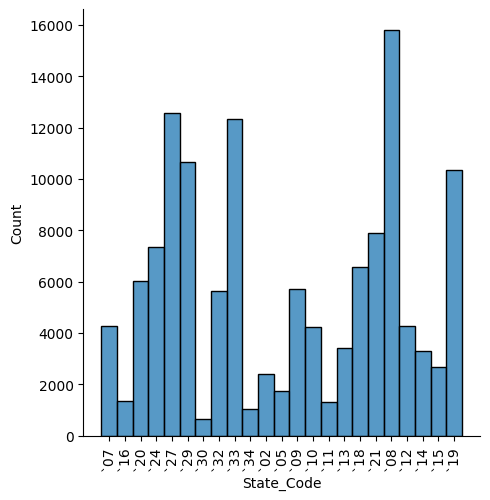

In [60]:
import seaborn as sns 
ax=sns.displot(new["State_Code"])
ax.tick_params(axis='x',rotation=90)

In [61]:
data["District_Code"].unique()

array(['`000', '`090', '`091', '`092', '`093', '`094', '`095', '`096',
       '`097', '`098', '`289', '`290', '`291', '`292', '`346', '`347',
       '`348', '`349', '`350', '`351', '`352', '`353', '`354', '`355',
       '`356', '`357', '`358', '`359', '`360', '`361', '`362', '`363',
       '`364', '`365', '`366', '`367', '`368', '`369', '`468', '`469',
       '`470', '`471', '`472', '`473', '`474', '`475', '`476', '`477',
       '`478', '`479', '`480', '`481', '`482', '`483', '`484', '`485',
       '`486', '`487', '`488', '`489', '`490', '`491', '`492', '`493',
       '`497', '`498', '`499', '`500', '`501', '`502', '`503', '`504',
       '`505', '`506', '`507', '`508', '`509', '`510', '`511', '`512',
       '`513', '`514', '`515', '`516', '`517', '`518', '`519', '`520',
       '`521', '`522', '`523', '`524', '`525', '`526', '`527', '`528',
       '`529', '`530', '`531', '`555', '`556', '`557', '`558', '`559',
       '`560', '`561', '`562', '`563', '`564', '`565', '`566', '`567',
      

In [62]:
'''from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

# Our sentences we like to encode
sentences = [new['lemmatized']
]

# Sentences are encoded by calling model.encode()
sentence_embeddings = model.encode(sentences)

sentence_embeddings'''

'from sentence_transformers import SentenceTransformer\n\nmodel = SentenceTransformer("all-MiniLM-L6-v2")\n\n# Our sentences we like to encode\nsentences = [new[\'lemmatized\']\n]\n\n# Sentences are encoded by calling model.encode()\nsentence_embeddings = model.encode(sentences)\n\nsentence_embeddings'

In [63]:
new

,State_Code,District_Code,state_ut,Division,Group,Class,NIC_NAME,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,tokenized_NIC,removed_stops,lemmatized
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,16266,1969,1494,475,59040,43249,15791,[Total],[Total],Total
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,74,23,13,10,201,137,64,"[Crop, and, animal, production, ,, hunting, an...","[Crop, animal, production, ,, hunting, related...","Crop animal production , hunt relate service a..."
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,27,14,12,2,78,53,25,"[Growing, of, non-perennial, crops]","[Growing, non-perennial, crops]",Growing non-perennial crop
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,10,8,6,2,29,21,8,"[Growing, of, cereals, (, except, rice, ), ,, ...","[Growing, cereals, (, except, rice, ), ,, legu...","Growing cereals ( except rice ) , leguminous c..."
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,"[Growing, of, rice]","[Growing, rice]",Growing rice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195133,`19,`345,District - Purba Medinipur,`98,`000,`0000,Undifferentiated goods- and services-producing...,15,9,6,...,19,18,3,15,4,0,4,"[Undifferentiated, goods-, and, services-produ...","[Undifferentiated, goods-, services-producing,...",Undifferentiated goods- services-producing act...
195135,`19,`345,District - Purba Medinipur,`98,`981,`9810,Undifferentiated goods-producing activities of...,15,9,6,...,6,9,3,6,0,0,0,"[Undifferentiated, goods-producing, activities...","[Undifferentiated, goods-producing, activities...",Undifferentiated goods-producing activities pr...
195137,`19,`345,District - Purba Medinipur,`98,`982,`9820,Undifferentiated service-producing activities ...,0,0,0,...,13,9,0,9,4,0,4,"[Undifferentiated, service-producing, activiti...","[Undifferentiated, service-producing, activiti...",Undifferentiated service-producing activities ...
195138,`19,`345,District - Purba Medinipur,`99,`000,`0000,Activities of extraterritorial organizations a...,16586,10482,6104,...,28623,35261,10206,25055,5202,1634,3568,"[Activities, of, extraterritorial, organizatio...","[Activities, extraterritorial, organizations, ...",Activities extraterritorial organizations body


In [64]:
new.head()

,State_Code,District_Code,state_ut,Division,Group,Class,NIC_NAME,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,tokenized_NIC,removed_stops,lemmatized
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,16266,1969,1494,475,59040,43249,15791,[Total],[Total],Total
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,74,23,13,10,201,137,64,"[Crop, and, animal, production, ,, hunting, an...","[Crop, animal, production, ,, hunting, related...","Crop animal production , hunt relate service a..."
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,27,14,12,2,78,53,25,"[Growing, of, non-perennial, crops]","[Growing, non-perennial, crops]",Growing non-perennial crop
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,10,8,6,2,29,21,8,"[Growing, of, cereals, (, except, rice, ), ,, ...","[Growing, cereals, (, except, rice, ), ,, legu...","Growing cereals ( except rice ) , leguminous c..."
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,"[Growing, of, rice]","[Growing, rice]",Growing rice


total word in nic


In [65]:
totalvals=new[new['NIC_NAME']=="total"]
tl=totalvals.District_Code.to_list()

In [66]:

new['lemmatized'].count()
new=new[~new['lemmatized'].isin(["total"])]
new.shape

(131696, 28)

In [67]:
unique_values = new['lemmatized'].unique().tolist()
len(unique_values)

558

In [68]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# Load a pre-trained Sentence-Transformer model (e.g., 'paraphrase-MiniLM-L6-v2')
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

unique_values
embeddings = model.encode(unique_values)
from sklearn.cluster import KMeans

num_clusters = 4 # Example number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings)


df5 = pd.DataFrame({'lemmatized': unique_values})




C:\Users\puliv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [69]:

df5['embeddings'] = df5['lemmatized'].apply(lambda x: model.encode(x))

In [70]:
new

,State_Code,District_Code,state_ut,Division,Group,Class,NIC_NAME,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,tokenized_NIC,removed_stops,lemmatized
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,16266,1969,1494,475,59040,43249,15791,[Total],[Total],Total
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,74,23,13,10,201,137,64,"[Crop, and, animal, production, ,, hunting, an...","[Crop, animal, production, ,, hunting, related...","Crop animal production , hunt relate service a..."
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,27,14,12,2,78,53,25,"[Growing, of, non-perennial, crops]","[Growing, non-perennial, crops]",Growing non-perennial crop
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,10,8,6,2,29,21,8,"[Growing, of, cereals, (, except, rice, ), ,, ...","[Growing, cereals, (, except, rice, ), ,, legu...","Growing cereals ( except rice ) , leguminous c..."
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,"[Growing, of, rice]","[Growing, rice]",Growing rice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195133,`19,`345,District - Purba Medinipur,`98,`000,`0000,Undifferentiated goods- and services-producing...,15,9,6,...,19,18,3,15,4,0,4,"[Undifferentiated, goods-, and, services-produ...","[Undifferentiated, goods-, services-producing,...",Undifferentiated goods- services-producing act...
195135,`19,`345,District - Purba Medinipur,`98,`981,`9810,Undifferentiated goods-producing activities of...,15,9,6,...,6,9,3,6,0,0,0,"[Undifferentiated, goods-producing, activities...","[Undifferentiated, goods-producing, activities...",Undifferentiated goods-producing activities pr...
195137,`19,`345,District - Purba Medinipur,`98,`982,`9820,Undifferentiated service-producing activities ...,0,0,0,...,13,9,0,9,4,0,4,"[Undifferentiated, service-producing, activiti...","[Undifferentiated, service-producing, activiti...",Undifferentiated service-producing activities ...
195138,`19,`345,District - Purba Medinipur,`99,`000,`0000,Activities of extraterritorial organizations a...,16586,10482,6104,...,28623,35261,10206,25055,5202,1634,3568,"[Activities, of, extraterritorial, organizatio...","[Activities, extraterritorial, organizations, ...",Activities extraterritorial organizations body


In [71]:
new11=new.join(df5.set_index('lemmatized'), on='lemmatized', validate='m:1')



In [72]:
new11

,State_Code,District_Code,state_ut,Division,Group,Class,NIC_NAME,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,tokenized_NIC,removed_stops,lemmatized,embeddings
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,1969,1494,475,59040,43249,15791,[Total],[Total],Total,"[0.7303211, 0.15034395, 0.026349224, -0.083803..."
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,23,13,10,201,137,64,"[Crop, and, animal, production, ,, hunting, an...","[Crop, animal, production, ,, hunting, related...","Crop animal production , hunt relate service a...","[0.24264622, -0.2510919, 0.50236523, 0.1033429..."
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,14,12,2,78,53,25,"[Growing, of, non-perennial, crops]","[Growing, non-perennial, crops]",Growing non-perennial crop,"[0.4185371, 0.3028173, -0.09338442, 0.17633829..."
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,8,6,2,29,21,8,"[Growing, of, cereals, (, except, rice, ), ,, ...","[Growing, cereals, (, except, rice, ), ,, legu...","Growing cereals ( except rice ) , leguminous c...","[0.10593776, -0.1409037, -0.17022488, 0.208671..."
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,"[Growing, of, rice]","[Growing, rice]",Growing rice,"[0.23747706, -0.3534962, -0.13877878, 0.593525..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195133,`19,`345,District - Purba Medinipur,`98,`000,`0000,Undifferentiated goods- and services-producing...,15,9,6,...,18,3,15,4,0,4,"[Undifferentiated, goods-, and, services-produ...","[Undifferentiated, goods-, services-producing,...",Undifferentiated goods- services-producing act...,"[-0.12591971, -0.55574507, -0.24442677, -0.012..."
195135,`19,`345,District - Purba Medinipur,`98,`981,`9810,Undifferentiated goods-producing activities of...,15,9,6,...,9,3,6,0,0,0,"[Undifferentiated, goods-producing, activities...","[Undifferentiated, goods-producing, activities...",Undifferentiated goods-producing activities pr...,"[0.10567852, -0.18250492, -0.14244734, -0.0066..."
195137,`19,`345,District - Purba Medinipur,`98,`982,`9820,Undifferentiated service-producing activities ...,0,0,0,...,9,0,9,4,0,4,"[Undifferentiated, service-producing, activiti...","[Undifferentiated, service-producing, activiti...",Undifferentiated service-producing activities ...,"[0.029100142, -0.4729408, -0.068358436, -0.095..."
195138,`19,`345,District - Purba Medinipur,`99,`000,`0000,Activities of extraterritorial organizations a...,16586,10482,6104,...,35261,10206,25055,5202,1634,3568,"[Activities, of, extraterritorial, organizatio...","[Activities, extraterritorial, organizations, ...",Activities extraterritorial organizations body,"[0.22699843, -0.070754394, -0.107533455, -0.40..."


In [73]:

# Apply K-means clustering
num_clusters = 4 # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
new11['cluster'] = kmeans.fit_predict(list(new11['embeddings']))

# Print the clustered sentences
'''for cluster_id in range(num_clusters):
    cluster_sentences = new1[new1['cluster'] == cluster_id]['lemmatized']
    print(f"Cluster {cluster_id + 1} ({len(cluster_sentences)} sentences):")
    print(cluster_sentences.tolist())
    

# Optional: You can explore the cluster centroids (cluster centers)
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers (Embeddings):")
print(cluster_centers)'''

# Optional: Assign meaningful labels to clusters based on content
# For example, you can manually inspect the sentences in each cluster
# and label them accordingly.

# Note: Adjust the model, data, and parameters according to your specific use case.


'for cluster_id in range(num_clusters):\n    cluster_sentences = new1[new1[\'cluster\'] == cluster_id][\'lemmatized\']\n    print(f"Cluster {cluster_id + 1} ({len(cluster_sentences)} sentences):")\n    print(cluster_sentences.tolist())\n    \n\n# Optional: You can explore the cluster centroids (cluster centers)\ncluster_centers = kmeans.cluster_centers_\nprint("Cluster Centers (Embeddings):")\nprint(cluster_centers)'

In [74]:
new11

,State_Code,District_Code,state_ut,Division,Group,Class,NIC_NAME,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,tokenized_NIC,removed_stops,lemmatized,embeddings,cluster
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,1494,475,59040,43249,15791,[Total],[Total],Total,"[0.7303211, 0.15034395, 0.026349224, -0.083803...",1
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,13,10,201,137,64,"[Crop, and, animal, production, ,, hunting, an...","[Crop, animal, production, ,, hunting, related...","Crop animal production , hunt relate service a...","[0.24264622, -0.2510919, 0.50236523, 0.1033429...",1
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,12,2,78,53,25,"[Growing, of, non-perennial, crops]","[Growing, non-perennial, crops]",Growing non-perennial crop,"[0.4185371, 0.3028173, -0.09338442, 0.17633829...",3
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,6,2,29,21,8,"[Growing, of, cereals, (, except, rice, ), ,, ...","[Growing, cereals, (, except, rice, ), ,, legu...","Growing cereals ( except rice ) , leguminous c...","[0.10593776, -0.1409037, -0.17022488, 0.208671...",3
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,"[Growing, of, rice]","[Growing, rice]",Growing rice,"[0.23747706, -0.3534962, -0.13877878, 0.593525...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195133,`19,`345,District - Purba Medinipur,`98,`000,`0000,Undifferentiated goods- and services-producing...,15,9,6,...,3,15,4,0,4,"[Undifferentiated, goods-, and, services-produ...","[Undifferentiated, goods-, services-producing,...",Undifferentiated goods- services-producing act...,"[-0.12591971, -0.55574507, -0.24442677, -0.012...",1
195135,`19,`345,District - Purba Medinipur,`98,`981,`9810,Undifferentiated goods-producing activities of...,15,9,6,...,3,6,0,0,0,"[Undifferentiated, goods-producing, activities...","[Undifferentiated, goods-producing, activities...",Undifferentiated goods-producing activities pr...,"[0.10567852, -0.18250492, -0.14244734, -0.0066...",1
195137,`19,`345,District - Purba Medinipur,`98,`982,`9820,Undifferentiated service-producing activities ...,0,0,0,...,0,9,4,0,4,"[Undifferentiated, service-producing, activiti...","[Undifferentiated, service-producing, activiti...",Undifferentiated service-producing activities ...,"[0.029100142, -0.4729408, -0.068358436, -0.095...",1
195138,`19,`345,District - Purba Medinipur,`99,`000,`0000,Activities of extraterritorial organizations a...,16586,10482,6104,...,10206,25055,5202,1634,3568,"[Activities, of, extraterritorial, organizatio...","[Activities, extraterritorial, organizations, ...",Activities extraterritorial organizations body,"[0.22699843, -0.070754394, -0.107533455, -0.40...",1


In [75]:
new11.describe()

,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,Main Workers - Rural - Persons,Main Workers - Rural - Males,Main Workers - Rural - Females,Main Workers - Urban - Persons,Main Workers - Urban - Males,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,cluster
count,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,1.316960e+05,131696.000000,131696.000000,131696.000000
mean,1.836543e+03,1.493028e+03,3.435152e+02,8.050197e+02,6.380539e+02,1.669659e+02,1.031524e+03,8.549741e+02,1.765494e+02,4.040905e+02,2.083642e+02,1.957262e+02,2.814096e+02,1.334592e+02,1.479504e+02,1.226809e+02,74.905046,47.775847,1.540396
std,5.501744e+04,4.544843e+04,1.009206e+04,2.450613e+04,1.980129e+04,5.039387e+03,3.123776e+04,2.619149e+04,5.329563e+03,1.376596e+04,6.770865e+03,7.228535e+03,9.656800e+03,4.369384e+03,5.481322e+03,4.439107e+03,2507.098983,1998.156218,1.146834
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+00,6.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000
50%,3.800000e+01,3.000000e+01,4.000000e+00,1.400000e+01,1.200000e+01,0.000000e+00,1.600000e+01,1.200000e+01,2.000000e+00,6.000000e+00,4.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000
75%,2.440000e+02,1.920000e+02,3.100000e+01,9.400000e+01,7.400000e+01,1.200000e+01,1.140000e+02,9.100000e+01,1.400000e+01,3.600000e+01,2.400000e+01,8.000000e+00,1.800000e+01,1.200000e+01,4.000000e+00,1.200000e+01,8.000000,2.000000,3.000000
max,1.561976e+07,1.280140e+07,2.818356e+06,6.770444e+06,5.446541e+06,1.323903e+06,8.849315e+06,7.354862e+06,1.494453e+06,3.834122e+06,1.966750e+06,1.867372e+06,2.515182e+06,1.223824e+06,1.291358e+06,1.318940e+06,742926.000000,576014.000000,3.000000


In [76]:
newdf1 = new11[new11['cluster'] == 0]
newdf1.to_csv('D:/clusteris0.csv', index=False)  # Specify the desired file name
newdf2 = new11[new11['cluster'] == 1]
newdf2.to_csv('D:/clusteris1.csv', index=False)
newdf3 = new11[new11['cluster'] == 2]
newdf3.to_csv('D:/clusteris2.csv', index=False)
newdf4 = new11[new11['cluster'] == 3]
newdf4.to_csv('D:/clusteris4.csv', index=False)
